In [14]:
from scipy.linalg import toeplitz
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def print_matrix(A, s=0, e=-1):
    B = A[s:e,s:e]
    for i in range(B.shape[0]):
        for j in range(B.shape[1]):
            #print("%  11.2e" % B[i,j], end='')
            print("%  7.1f" % B[i,j], end='')
        print()

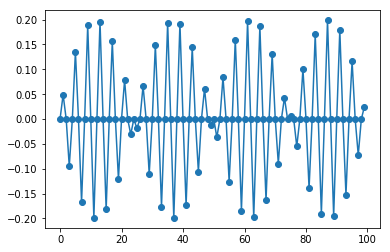

I would expect these shouls look a bit like sine waves. Why does this look like 
total nonsense?


In [145]:
N = 100

vec1 = np.zeros(N)
vec2 = np.zeros(N)
vec1[1] = 1
vec2[1] = -1
D = toeplitz(c=vec2, r=vec1)
T = -np.matmul(D,D)

#print("Matrix T:")
#print_matrix(T, e=N)
#print()

val, vec = np.linalg.eig(T)

#en = val;
#print("Eigenvalues:")
#print(en)
#print()
#print("Why are there two energies for each? ISW should not be 2-fold degenerate?")

plt.plot(vec[:,53], 'o-')
plt.show()

print("I would expect these shouls look a bit like sine waves. Why does this look like \n"
     "total nonsense?")

In [80]:
val, vec = np.linalg.eig(T)
test = np.matmul(T, vec[1])
print(np.array([test, vec[1]]).T)

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.32601868  0.        ]
 [-0.16989112  0.        ]
 [-1.1077715  -0.32601868]
 [ 0.93666704  0.16989112]
 [ 0.68895823  0.45573414]
 [-1.3636607  -0.59688479]
 [ 0.09279459  0.54852873]]


In [162]:
M = np.array([[ 1,  0, -1,  0,  0 ], 
              [ 0,  2,  0, -1,  0 ], 
              [-1,  0,  2,  0, -1], 
              [ 0, -1,  0,  2,  0], 
              [ 0,  0, -1,  0,  1]])
print_matrix(M, e=5)
val, vec = np.linalg.eigh(M)
vec[:,0]
test = np.matmul(M, vec[:,0])
print("\nleft eigv, rigth M matmul eigv \n")
print(np.array([ vec[:,0], M.dot(vec[:,0])]).T)
print("\nSeems an awful lot like it is not an eigenvector?")

    1.0    0.0   -1.0    0.0    0.0
    0.0    2.0    0.0   -1.0    0.0
   -1.0    0.0    2.0    0.0   -1.0
    0.0   -1.0    0.0    2.0    0.0
    0.0    0.0   -1.0    0.0    1.0

left eigv, rigth M matmul eigv 

[[-5.77350269e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-5.77350269e-01  2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [-5.77350269e-01 -1.11022302e-16]]

Seems an awful lot like it is not an eigenvector?


[ 0.00000000e+00  0.00000000e+00  2.22044605e-16  0.00000000e+00
 -1.11022302e-16]
[[ 0.00000000e+00 -5.77350269e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.22044605e-16 -5.77350269e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [-1.11022302e-16 -5.77350269e-01]]


In [101]:
T.shape

(10, 10)

Update: Anton helped me figure it out!

Upshot: you should not use center difference definition for derivative since it splits your grid into two decoupled sublattices. 

Trick from Jos: `np.eye` is a great tool for this!